Davies-Bouldin Index: 0.8524813520458039


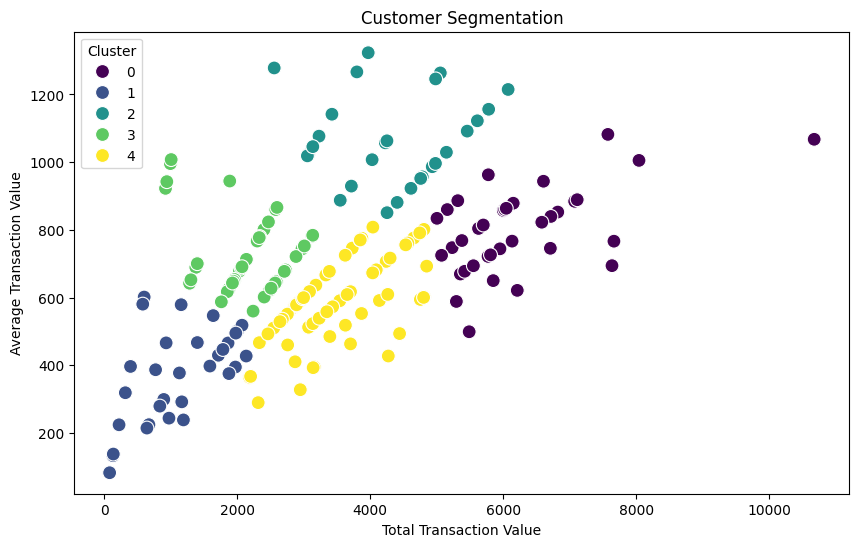

Cluster
0    36
1    31
2    27
3    41
4    64
Name: count, dtype: int64


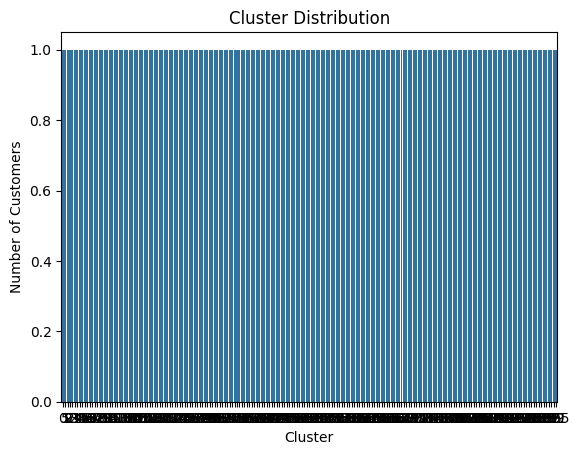

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

data = pd.merge(customers_df, transactions_df, on='CustomerID', how='inner')

data['Total_Transaction_Value'] = data.groupby('CustomerID')['TotalValue'].transform('sum')
data['Avg_Transaction_Value'] = data.groupby('CustomerID')['TotalValue'].transform('mean')
data['Num_Transactions'] = data.groupby('CustomerID')['TransactionID'].transform('count')

data = data.drop_duplicates(subset=['CustomerID'])

features = data[['Total_Transaction_Value', 'Avg_Transaction_Value', 'Num_Transactions']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

db_index = davies_bouldin_score(scaled_features, data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Total_Transaction_Value'], y=data['Avg_Transaction_Value'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Total Transaction Value')
plt.ylabel('Average Transaction Value')
plt.legend(title='Cluster')
plt.show()

cluster_counts = data['Cluster'].value_counts().sort_index()
print(cluster_counts)

sns.countplot(data['Cluster'])
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

data.to_csv('Customer_Segmentation_Results.csv', index=False)

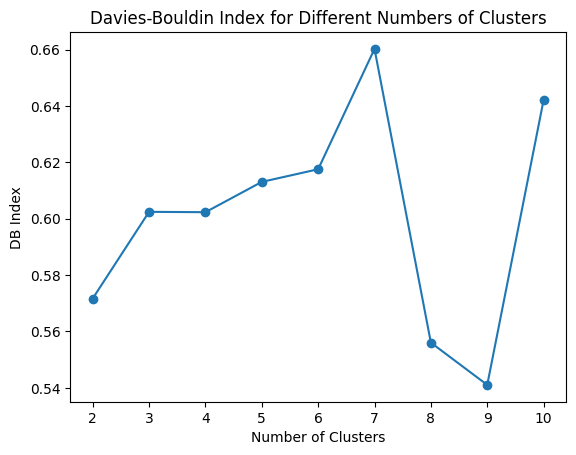

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

db_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    db_index = davies_bouldin_score(X, labels)
    db_scores.append(db_index)

plt.plot(range(2, 11), db_scores, marker='o')
plt.title("Davies-Bouldin Index for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("DB Index")
plt.show()

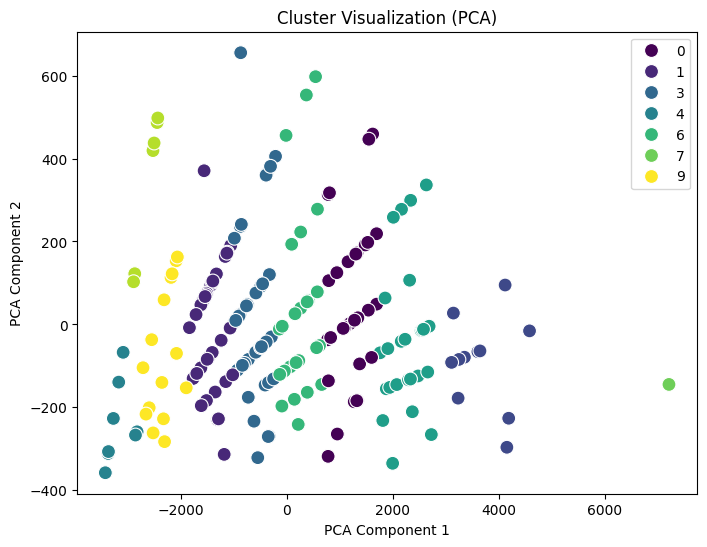

In [8]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=100)
plt.title("Cluster Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [18]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
import numpy as np


X = data[['Total_Transaction_Value', 'Avg_Transaction_Value', 'Num_Transactions']].values  # Your features

kmeans = KMeans(n_clusters= 7)  
kmeans.fit(X)
labels = kmeans.labels_

# Calculate DB Index
db_index = davies_bouldin_score(X, labels)
print(f"DB Index: {db_index}")

DB Index: 0.6118904564186461
